<a href="https://colab.research.google.com/github/limu050404/CS361-Homework/blob/main/Homework2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
file = pd.read_csv('https://raw.githubusercontent.com/limu050404/CS361-Homework/main/cigcancer-1.txt', sep='\t')
file


,STATE,CIG,BLAD,LUNG,KID,LEUK
0,AL,18.20,2.90,17.05,1.59,6.15
1,AZ,25.82,3.52,19.80,2.75,6.61
2,AR,18.24,2.99,15.98,2.02,6.94
3,CA,28.60,4.46,22.07,2.66,7.06
4,CT,31.10,5.11,22.83,3.35,7.20
5,DC,40.46,5.60,27.27,3.13,7.08
6,DE,33.60,4.78,24.55,3.36,6.45
7,FL,28.27,4.46,23.57,2.41,6.07
8,ID,20.10,3.08,13.58,2.46,6.62
9,IL,27.91,4.75,22.80,2.95,7.27


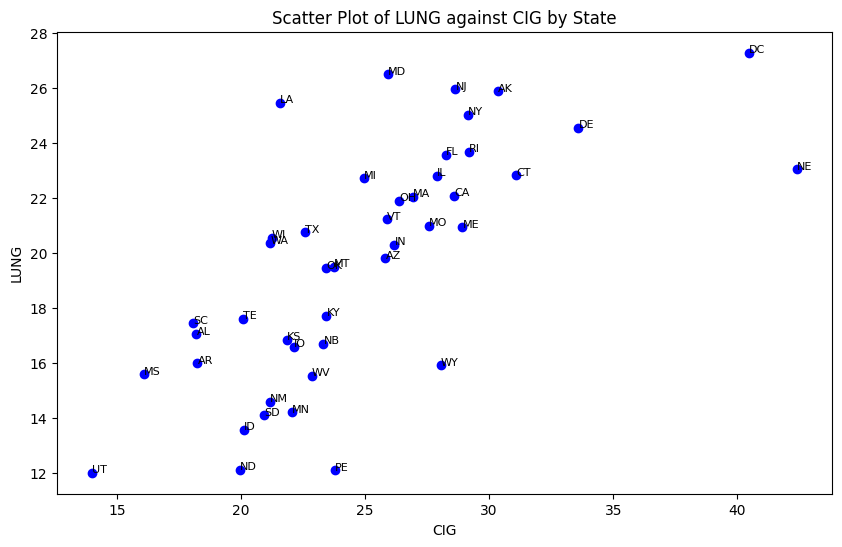

In [10]:
plt.figure(figsize=(10, 6))
for i, row in file.iterrows():
    plt.scatter(row['CIG'], row['LUNG'], marker='o', color='blue')
    plt.annotate(row['STATE'], (row['CIG'], row['LUNG']), fontsize=8)
plt.xlabel('CIG')
plt.ylabel('LUNG')
plt.title('Scatter Plot of LUNG against CIG by State')
plt.show()

In [23]:
correlation_all_lung = file['CIG'].corr(file['LUNG'])
correlation_all_lung

0.6974025049275292

In [24]:
lung_Q1 = file['CIG'].quantile(0.25)
lung_Q3 = file['CIG'].quantile(0.75)
lung_IQR = lung_Q3 - lung_Q1
lung_lower_bound = lung_Q1 - 1.5 * lung_IQR
lung_upper_bound = lung_Q3 + 1.5 * lung_IQR
lung_no_outliers = file[(file['CIG'] >= lung_lower_bound) & (file['CIG'] <= lung_upper_bound)]
correlationj_lung = lung_no_outliers['CIG'].corr(lung_no_outliers['LUNG'])
correlationj_lung

0.7144799640258739

After removing the outliers, the correlation coefficient becomes higher, indicating a stronger relationship.

In [25]:
correlation_all_blad = file['CIG'].corr(file['BLAD'])
correlation_all_blad

0.7036218594614418

In [27]:

blad_no_outliers = file[(file['CIG'] >= lung_lower_bound) & (file['CIG'] <= lung_upper_bound)]
correlation_blad = blad_no_outliers['CIG'].corr(blad_no_outliers['BLAD'])
correlation_blad

0.6076263762900919

The outliers somehow strengthen the relationship of cigarette sales and the bladder cancer death, because after removing the outliers, there is a significant drop of the value of correlation coefficient.

In [28]:
correlation_all_kid = file['CIG'].corr(file['KID'])
correlation_all_kid


0.48738961703356476

In [29]:

kid_no_outliers = file[(file['CIG'] >= lung_lower_bound) & (file['CIG'] <= lung_upper_bound)]
correlation_kid = kid_no_outliers['CIG'].corr(kid_no_outliers['KID'])
correlation_kid

0.5790799432330065

The outliers weakened the relationship between cigaratte sales and kidney cancer deaths, because the correlation coefficient was higher after removing the outliers.

In [32]:
correlation_all_leuk = file['CIG'].corr(file['LEUK'])
correlation_all_leuk

-0.06848122947663897

In [33]:
leuk_no_outliers = file[(file['CIG'] >= lung_lower_bound) & (file['CIG'] <= lung_upper_bound)]
correlation_leuk = leuk_no_outliers['CIG'].corr(leuk_no_outliers['LEUK'])
correlation_leuk

-0.10100873838467626

The outliers can tiny weaken the correlation between leukemia and cigarette sales, because after removing the outliers, the absolute value of the correlation coefficient increased.

The positive correlation coefficient between lung cancer deaths and cigarette sales could help prove that smoking causes lung cancer, because the value of correlation coefficient is very high, about 0.7. Based on common sense that smoking could damage the lung, we could say that smking causes lung cancer.
When talking about leukemia, things turns out to be different. The low absolute value of correlation coefficient shows the poor correlation between leukemia and smoking. Although the correlation coefficient is negative, it cannot show that more smoking could decreases the possibility of leukemia death.